## Spam message classification

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, 
Our collection of spam e-mails came from our postmaster and individuals who had filed spam. O
ur collection of non-spam e-mails came from filed work and personal e-mails, and hence the
word 'george' and the area code '650' are indicators of non-spam. 
These are useful when constructing a personalized spam filter. 
One would either have to blind such non-spam indicators or
get a very wide collection of non-spam to generate a general purpose spam filter.



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 

48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 




In [2]:
import pandas as pd

In [3]:
messages = pd.read_csv('SMSSpamCollection.csv', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis 

In [7]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [13]:
messages.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

## Data Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

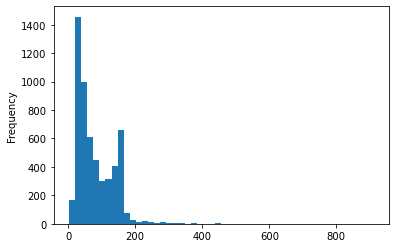

In [18]:
messages['length'].plot(bins=50, kind='hist') 

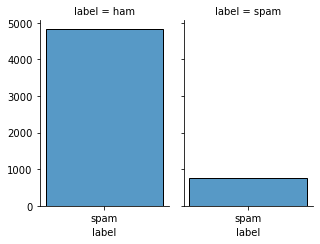

In [20]:

g = sns.FacetGrid(messages, col="label", height=3.5, aspect=.65)
g.map(sns.histplot, "label")

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

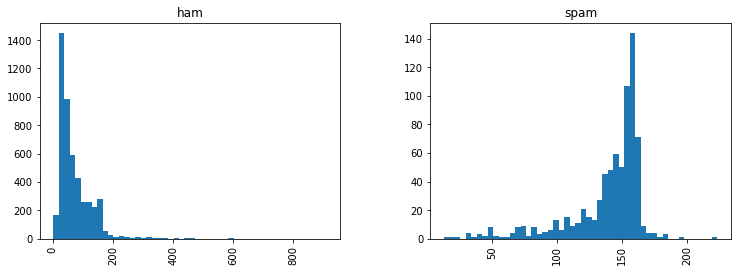

In [22]:
messages.hist(column='length', by='label',bins=50,figsize=(12,4))

 ## Natural Language Data Pre Processing

In [4]:
from nltk.corpus import stopwords
import string
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    lemma = nlp.WordNetLemmatizer()
    nopunc = [ lemma.lemmatize(word) for word in nopunc]

## Word Cloud

In [25]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd
import numpy as np
import nltk
import re
import os
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/toyosibamidele/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

'''
1. Lowercase text
2. Remove whitespace
3. Remove numbers
4. Remove special characters
5. Remove emails
6. Remove stop words
7. Remove NAN
8. Remove weblinks
9. Expand contractions (if possible not necessary)
10. Tokenize
11. Stemming
12. Lemmatizer

'''

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 1 if not w in stopwords.words('english')]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)


messages['cleaned']= messages['message'].map(lambda s:preprocess(s)) 
messages['cleaned']


0       go jurong point crazy available bugis great wo...
1                                   ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts st ...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact pound prize claim easy c...
5568                              going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: cleaned, Length: 5572, dtype: object

In [52]:
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
messages['clean']= messages['cleaned'].apply(text_process)



In [53]:
ham = messages[messages["label"] == 'ham']
spam = messages[messages["label"] == 'spam']
ham.reset_index(drop=True, inplace=True)
spam.reset_index(drop=True, inplace=True)
len(ham)



def word_document(cleaned_data):

    dfs = {}

    for i in range(len(cleaned_data)):
        for word in cleaned_data[i]:
            try:
                dfs[word].add(i)
            except:
                dfs[word] = {i}
    return dfs

ham_word_doc = word_document(cleaned_data = ham['clean'])    
spam_word_doc = word_document(cleaned_data = spam['clean'])   


In [54]:
def word_count(word_document):
    
    new_dict = {}

    for key,value in word_document.items():  
        new_dict[key] = 1 + sum(1 for v in value if v)
        
    return  new_dict
        
ham_word_count = word_count(word_document = ham_word_doc )
spam_word_count = word_count(word_document = spam_word_doc )
spam_word_count


s = set( val for dic in spam_word_count for val in spam_word_count.keys())
'apply' in s



True

In [55]:
def term_frequency(data_cleaned,word_val):

    tf_idf = {}

    for i in range(len(data_cleaned)):
        counter = Counter(data_cleaned[i])
        for token in np.unique(data_cleaned[i]):
            tf = counter[token]/len(data_cleaned[i])
            if token not in word_val:
                pass
            else:
                df = word_val[token]
                idf = np.log(len(data_cleaned)/(df+1))
                tf_idf[i, token] = tf*idf

    return tf_idf
    
ham_tf_idf = term_frequency(ham['clean'],ham_word_count)
spam_tf_idf = term_frequency(data_cleaned = spam['clean'],word_val = spam_word_count)

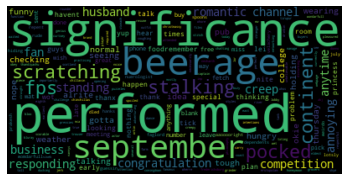

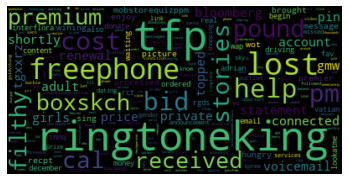

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud_plot(term_freq):
    word_cloud_dict = {}

    for key, val in term_freq.items():
        if key[1] not in word_cloud_dict or val > word_cloud_dict[key[1]]:
            word_cloud_dict[key[1]] = val

    wordcloud = WordCloud().generate_from_frequencies(word_cloud_dict)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
word_cloud_plot(ham_tf_idf) 
word_cloud_plot(spam_tf_idf) 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [8]:
messages_bow = bow_transformer.transform(messages['message'])

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [41]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2, random_state = 42)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(random_state=1)

In [46]:
pipeline_nn = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier()),  # train on TF-IDF vectors w/ SVM
])

In [47]:
pipeline_nn.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fcab0e20ca0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_it

In [48]:
predictions_nn = pipeline_nn.predict(msg_test)

In [54]:
print(classification_report(predictions_nn,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       974
        spam       0.93      0.99      0.96       141

    accuracy                           0.99      1115
   macro avg       0.97      0.99      0.98      1115
weighted avg       0.99      0.99      0.99      1115



## Ensemble Model Stacking

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
messages_bow = bow_transformer.transform(messages['message'])

tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)
messages_tfidf

new_label  = messages.label.replace(to_replace=['ham', 'spam'], value=[0, 1])

(5572, 11425)


In [60]:
from vecstack import stacking
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


models = [
   LogisticRegression(),
    KNeighborsClassifier(),
    MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1),
    #GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()       
    
]

msg_train, msg_test, label_train, label_test = train_test_split(messages_tfidf, new_label , test_size=0.2)


S_train, S_test = stacking(models,                   
                           msg_train, label_train, msg_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)




task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [LogisticRegression]
    fold  0:  [0.92735426]
    fold  1:  [0.93177738]
    fold  2:  [0.91292639]
    fold  3:  [0.92190305]
    ----
    MEAN:     [0.92349027] + [0.00703067]
    FULL:     [0.92349114]

model  1:     [KNeighborsClassifier]
    fold  0:  [0.89147982]
    fold  1:  [0.88779174]
    fold  2:  [0.88689408]
    fold  3:  [0.88150808]
    ----
    MEAN:     [0.88691843] + [0.00356516]
    FULL:     [0.88691945]

model  2:     [MLPClassifier]
    fold  0:  [0.98026906]
    fold  1:  [0.97845601]
    fold  2:  [0.97307002]
    fold  3:  [0.97935368]
    ----
    MEAN:     [0.97778719] + [0.00279788]
    FULL:     [0.97778775]

model  3:     [DecisionTreeClassifier]
    fold  0:  [0.96860987]
    fold  1:  [0.96140036]
    fold  2:  [0.95780969]
    fold  3:  [0.95601436]
    ----
    MEAN:     [0.96095857] + [0.00482437]
    FULL:  

In [61]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train,  label_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(label_test, y_pred))

xgb_acc = accuracy_score(label_test, y_pred)
xgb_prec = precision_score(label_test, y_pred)
xgb_rec = recall_score(label_test, y_pred)
xgb_f1 = f1_score(label_test, y_pred)

[22:56:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Final prediction score: [0.98116592]


/Users/toyosibamidele/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Independent Classifier without Pipeline

In [62]:
# Separate input features and target
from time import time

Log_R = LogisticRegression()
KNN = KNeighborsClassifier()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)
NB = GaussianNB()
DTC = DecisionTreeClassifier()
RTC = RandomForestClassifier()


algo_list= [Log_R,KNN,clf,DTC,RTC]

def model_imbalance_test(y,X):


    start_time=time()
    accuracy=[]
    precision= []
    recall = []
    f1_s = []
    
    dict_classifiers = {
        
    'Log_R':LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'clf': MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(15,), random_state=1),
    'DTC': DecisionTreeClassifier(),
    'RTC': RandomForestClassifier()
}
    
    for each_model, model_instantiation in dict_classifiers.items():

    # setting up testing and training sets
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


        classifier =  model_instantiation.fit(X_train, y_train)

        pred = classifier.predict(X_test)

        acc = accuracy_score(y_test, pred)
        accuracy.append(acc)
        prec = precision_score(y_test, pred)
        precision.append(prec)
        rec = recall_score(y_test, pred)
        recall.append(rec)
        f1 = f1_score(y_test, pred)
        f1_s.append(f1)


        msg = "%s = %.2f" % (each_model,round(acc, 2))
        msg = "%s = %.2f" % (each_model,round(prec, 2))
        msg = "%s = %.2f" % (each_model,round(rec, 2))
        msg = "%s = %.2f" % (each_model,round(f1, 2))

        metrics_data = (pd.DataFrame(zip(algo_list,accuracy,precision,recall,f1_s),columns=['Model Used','accuracy','precision','recall','f1_s']))
        
    return metrics_data

results_df = model_imbalance_test(y = new_label, X= messages_tfidf)


In [63]:
results_df

,Model Used,accuracy,precision,recall,f1_s
0,LogisticRegression(),0.925341,1.000000,0.48,0.648649
1,KNeighborsClassifier(),0.880833,1.000000,0.17,0.290598
2,"MLPClassifier(alpha=1e-05, hidden_layer_sizes=...",0.979899,0.957447,0.90,0.927835
3,DecisionTreeClassifier(),0.966260,0.947368,0.81,0.873315
4,RandomForestClassifier(),0.964106,1.000000,0.75,0.857143


                                          Model Used  accuracy  precision  \
0                               LogisticRegression()  0.925341   1.000000   
1                             KNeighborsClassifier()  0.880833   1.000000   
2  MLPClassifier(alpha=1e-05, hidden_layer_sizes=...  0.979899   0.957447   
3                           DecisionTreeClassifier()  0.966260   0.947368   
4                           RandomForestClassifier()  0.964106   1.000000   
5                                            XGBoost  0.981166   0.977099   

     recall      f1_s    Model Name  
0  0.480000  0.648649        LogReg  
1  0.170000  0.290598           KNN  
2  0.900000  0.927835     NeuralNet  
3  0.810000  0.873315  DecisionTree  
4  0.750000  0.857143  RandomForest  
5  0.876712  0.924188       XGBoost  


,Model Name,accuracy,precision,recall,f1_s
0,LogReg,0.925341,1.000000,0.480000,0.648649
1,KNN,0.880833,1.000000,0.170000,0.290598
2,NeuralNet,0.979899,0.957447,0.900000,0.927835
3,DecisionTree,0.966260,0.947368,0.810000,0.873315
4,RandomForest,0.964106,1.000000,0.750000,0.857143
5,XGBoost,0.981166,0.977099,0.876712,0.924188


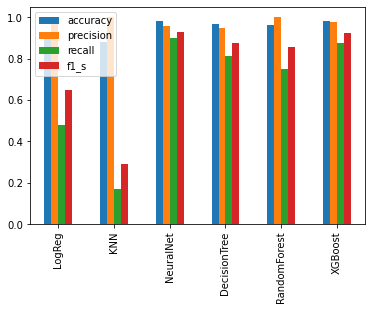

In [64]:
df = {'Model Used': 'XGBoost', 'accuracy': xgb_acc, 'precision':xgb_prec,'recall':xgb_rec,'f1_s':xgb_f1} 
df3 = results_df.append(df, ignore_index = True) 
df3['Model Name'] = ['LogReg','KNN','NeuralNet','DecisionTree','RandomForest','XGBoost']
print(df3)
ax = df3[['Model Name','accuracy','precision','recall','f1_s']].plot(kind = 'bar')
ax.set_xticks(df3.index)
ax.set_xticklabels(df3['Model Name'], rotation=90)
df3[['Model Name','accuracy','precision','recall','f1_s']]

## Oversample minority class

In [72]:
from sklearn.utils import resample
y_over = new_label
X_over = messages_tfidf.todense()

x_train, x_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=27)

X = pd.concat([pd.DataFrame(x_train), y_train], axis=1)

ham = X[X.label==0]
spam = X[X.label==1]

spam_upsampled = resample(spam,
                          replace=True, # sample with replacement
                          n_samples=len(ham), # match number in majority class
                          random_state=27) # reproducible results

upsampled = pd.concat([ham , spam_upsampled])
upsampled.label.value_counts()
upsampled.reset_index(drop=True, inplace=True)
upsampled.label.value_counts()
x = upsampled.dropna()

pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,...,11415,11416,11417,11418,11419,11420,11421,11422,11423,11424
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.utils import shuffle

y_train = x['label']
X_train = x.drop('label', axis=1)

#X_train, y_train = shuffle(X_train, y_train)

upsampled = LogisticRegression(solver='liblinear').fit(X_train,y_train)

upsampled_pred = upsampled.predict(pd.DataFrame(x_test))

#Checking accuracy
accuracy_score(y_test, upsampled_pred)
    
#f1 score
f1_score(y_test, upsampled_pred)
    
#recall_score(y_test, upsampled_pred)
pd.DataFrame(y_test)
accuracy_score(y_test, upsampled_pred)

0.7315147164393395

In [75]:
def over_sample_test(x,y,x_t,y_t):
   
    start_time=time()
    accuracy=[]
    precision= []
    recall = []
    f1_s = []
    
    dict_classifiers = {
        
    'Log_R':LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'clf': MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(15,), random_state=1),
    'DTC': DecisionTreeClassifier(),
    'RTC': RandomForestClassifier()
}
    
    for each_model, model_instantiation in dict_classifiers.items():


        classifier =  model_instantiation.fit(x, y)

        pred = classifier.predict(x_t)

        acc = accuracy_score(y_t, pred)
        accuracy.append(acc)
        prec = precision_score(y_t, pred)
        precision.append(prec)
        rec = recall_score(y_t, pred)
        recall.append(rec)
        f1 = f1_score(y_t, pred)
        f1_s.append(f1)


        msg = "%s = %.2f" % (each_model,round(acc, 2))
        msg = "%s = %.2f" % (each_model,round(prec, 2))
        msg = "%s = %.2f" % (each_model,round(rec, 2))
        msg = "%s = %.2f" % (each_model,round(f1, 2))

        metrics_data = (pd.DataFrame(zip(algo_list,accuracy,precision,recall,f1_s),columns=['Model Used','accuracy','precision','recall','f1_s']))
        
    return metrics_data

results_over_sample = over_sample_test(X_train,y_train, x_test, y_test)



In [77]:
results_over_sample

,Model Used,accuracy,precision,recall,f1_s
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.731515,0.060606,0.060,0.060302
1,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.831299,0.192982,0.055,0.085603
2,"MLPClassifier(activation='relu', alpha=1e-05, ...",0.777459,0.063492,0.040,0.049080
3,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.730797,0.093023,0.100,0.096386
4,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.816942,0.089552,0.030,0.044944


In [78]:
from vecstack import stacking
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


models = [
   LogisticRegression(),
    KNeighborsClassifier(),
    MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1),
    #GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()       
    
]


S_train, S_test = stacking(models,                   
                           X_train, y_train, x_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)



task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [LogisticRegression]
    fold  0:  [0.90058480]
    fold  1:  [0.89685443]
    fold  2:  [0.90270666]
    fold  3:  [0.89027067]
    ----
    MEAN:     [0.89760414] + [0.00472393]
    FULL:     [0.89760468]

model  1:     [KNeighborsClassifier]
    fold  0:  [0.86769006]
    fold  1:  [0.91002195]
    fold  2:  [0.85735187]
    fold  3:  [0.85076811]
    ----
    MEAN:     [0.87145799] + [0.02306746]
    FULL:     [0.87145730]

model  2:     [MLPClassifier]
    fold  0:  [0.96125731]
    fold  1:  [0.94732992]
    fold  2:  [0.94732992]
    fold  3:  [0.94367228]
    ----
    MEAN:     [0.94989736] + [0.00672651]
    FULL:     [0.94989943]

model  3:     [DecisionTreeClassifier]
    fold  0:  [0.91520468]
    fold  1:  [0.90709583]
    fold  2:  [0.90124360]
    fold  3:  [0.91075347]
    ----
    MEAN:     [0.90857440] + [0.00511458]
    FULL:  

In [83]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)

model.fit(S_train,y_train)
y_pred = model.predict(S_test)

rff_acc = accuracy_score(y_test, y_pred)
print(f"{rff_acc} accuracy")
rff_prec = precision_score(y_test, y_pred)
print(f"{rff_prec} precision")
rff_rec = recall_score(y_test, y_pred)
print(f"{rff_rec} recall")
rff_f1 = f1_score(y_test, y_pred)
print(f"{rff_f1} f1_score")

[21:09:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8262742282842785 accuracy
0.09615384615384616 precision
0.025 recall
0.03968253968253968 f1_score


                                          Model Used  accuracy  precision  \
0  LogisticRegression(C=1.0, class_weight=None, d...  0.731515   0.060606   
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.831299   0.192982   
2  MLPClassifier(activation='relu', alpha=1e-05, ...  0.777459   0.063492   
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.730797   0.093023   
4  RandomForestClassifier(bootstrap=True, ccp_alp...  0.816942   0.089552   
5                                            XGBoost  0.826274   0.096154   

   recall      f1_s    Model Name  
0   0.060  0.060302        LogReg  
1   0.055  0.085603           KNN  
2   0.040  0.049080     NeuralNet  
3   0.100  0.096386  DecisionTree  
4   0.030  0.044944  RandomForest  
5   0.025  0.039683       XGBoost  


,Model Name,accuracy,precision,recall,f1_s
0,LogReg,0.731515,0.060606,0.060,0.060302
1,KNN,0.831299,0.192982,0.055,0.085603
2,NeuralNet,0.777459,0.063492,0.040,0.049080
3,DecisionTree,0.730797,0.093023,0.100,0.096386
4,RandomForest,0.816942,0.089552,0.030,0.044944
5,XGBoost,0.826274,0.096154,0.025,0.039683


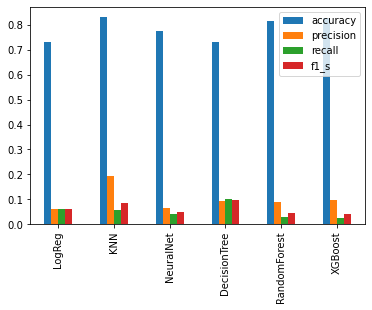

In [84]:
df = {'Model Used': 'XGBoost', 'accuracy': rff_acc, 'precision':rff_prec,'recall':rff_rec,'f1_s':rff_f1} 
df3 = results_over_sample.append(df, ignore_index = True) 
df3['Model Name'] = ['LogReg','KNN','NeuralNet','DecisionTree','RandomForest','XGBoost']
print(df3)
ax = df3[['Model Name','accuracy','precision','recall','f1_s']].plot(kind = 'bar')
ax.set_xticks(df3.index)
ax.set_xticklabels(df3['Model Name'], rotation=90)
df3[['Model Name','accuracy','precision','recall','f1_s']]

## Under Sampling

In [85]:
from sklearn.utils import resample
new_label  = messages.label.replace(to_replace=['ham', 'spam'], value=[0, 1])
y_over = new_label
X_over = messages_tfidf.todense()

x_train, x_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=27)

X = pd.concat([pd.DataFrame(x_train), y_train], axis=1)

ham = X[X.label==0]
spam = X[X.label==1]


ham.reset_index(drop=True, inplace=True)
spam.reset_index(drop=True, inplace=True)
len(ham)

ham_downsampled = resample(ham,
                                replace = False, # sample without replacement
                                n_samples = len(spam), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([ham_downsampled, spam])

# # checking counts
downsampled.label.value_counts()

x_test
downsample = downsampled.dropna()
downsample 

,0,1,2,3,4,5,6,7,8,9,...,11416,11417,11418,11419,11420,11421,11422,11423,11424,label
706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.396973,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [89]:

y_train = downsample.label
X_train = (downsample.drop('label', axis=1))

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(pd.DataFrame(x_test))

# Checking accuracy
accuracy_score(y_test, undersampled_pred)


# f1 score
f1_score(y_test, undersampled_pred)


recall_score(y_test, undersampled_pred)

precision_score(y_test, undersampled_pred)



0.13231197771587744

In [91]:
def under_sample(x,y,x_t,y_t):
   
    start_time=time()
    accuracy=[]
    precision= []
    recall = []
    f1_s = []
    
    dict_classifiers = {
        
    'Log_R':LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'clf': MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(15,), random_state=1),
    'DTC': DecisionTreeClassifier(),
    'RTC': RandomForestClassifier()
}
    
    for each_model, model_instantiation in dict_classifiers.items():


        classifier =  model_instantiation.fit(x, y)

        pred = classifier.predict(x_t)

        acc = accuracy_score(y_t, pred)
        accuracy.append(acc)
        prec = precision_score(y_t, pred)
        precision.append(prec)
        rec = recall_score(y_t, pred)
        recall.append(rec)
        f1 = f1_score(y_t, pred)
        f1_s.append(f1)


        msg = "%s = %.2f" % (each_model,round(acc, 2))
        msg = "%s = %.2f" % (each_model,round(prec, 2))
        msg = "%s = %.2f" % (each_model,round(rec, 2))
        msg = "%s = %.2f" % (each_model,round(f1, 2))

        metrics_data = (pd.DataFrame(zip(algo_list,accuracy,precision,recall,f1_s),columns=['Model Used','accuracy','precision','recall','f1_s']))
        
    return metrics_data

results_under_sample = under_sample( x= X_train, y= y_train,x_t = pd.DataFrame(x_test), y_t = y_test)




In [92]:
results_under_sample

,Model Used,accuracy,precision,recall,f1_s
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.477387,0.132312,0.475,0.206972
1,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.640345,0.133820,0.275,0.180033
2,"MLPClassifier(activation='relu', alpha=1e-05, ...",0.549892,0.137521,0.405,0.205323
3,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.553482,0.138699,0.405,0.206633
4,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.658291,0.096491,0.165,0.121771


In [93]:
from vecstack import stacking
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


models = [
   LogisticRegression(),
    KNeighborsClassifier(),
    MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1),
    #GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()       
    
]


S_train, S_test = stacking(models,                   
                           X_train, y_train, pd.DataFrame(x_test),   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [LogisticRegression]
    fold  0:  [0.46376812]
    fold  1:  [0.51207729]
    fold  2:  [0.48058252]
    fold  3:  [0.50000000]
    ----
    MEAN:     [0.48910698] + [0.01844599]
    FULL:     [0.48910412]

model  1:     [KNeighborsClassifier]
    fold  0:  [0.52173913]
    fold  1:  [0.51207729]
    fold  2:  [0.36893204]
    fold  3:  [0.45145631]
    ----
    MEAN:     [0.46355119] + [0.06090913]
    FULL:     [0.46368039]

model  2:     [MLPClassifier]
    fold  0:  [0.52173913]
    fold  1:  [0.53140097]
    fold  2:  [0.46601942]
    fold  3:  [0.52912621]
    ----
    MEAN:     [0.51207143] + [0.02682699]
    FULL:     [0.51210654]

model  3:     [DecisionTreeClassifier]
    fold  0:  [0.47342995]
    fold  1:  [0.49275362]
    fold  2:  [0.48058252]
    fold  3:  [0.51456311]
    ----
    MEAN:     [0.49033230] + [0.01560242]
    FULL:  

In [95]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)

model.fit(S_train,y_train)
y_pred = model.predict(S_test)

rff_acc = accuracy_score(y_test, y_pred)
print(f"{rff_acc} accuracy")
rff_prec = precision_score(y_test, y_pred)
print(f"{rff_prec} precision")
rff_rec = recall_score(y_test, y_pred)
print(f"{rff_rec} recall")
rff_f1 = f1_score(y_test, y_pred)
print(f"{rff_f1} f1_score")

[21:34:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.3797559224694903 accuracy
0.14224137931034483 precision
0.66 recall
0.23404255319148937 f1_score


                                          Model Used  accuracy  precision  \
0  LogisticRegression(C=1.0, class_weight=None, d...  0.477387   0.132312   
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.640345   0.133820   
2  MLPClassifier(activation='relu', alpha=1e-05, ...  0.549892   0.137521   
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.553482   0.138699   
4  RandomForestClassifier(bootstrap=True, ccp_alp...  0.658291   0.096491   
5                                            XGBoost  0.379756   0.142241   

   recall      f1_s    Model Name  
0   0.475  0.206972        LogReg  
1   0.275  0.180033           KNN  
2   0.405  0.205323     NeuralNet  
3   0.405  0.206633  DecisionTree  
4   0.165  0.121771  RandomForest  
5   0.660  0.234043       XGBoost  


,Model Name,accuracy,precision,recall,f1_s
0,LogReg,0.477387,0.132312,0.475,0.206972
1,KNN,0.640345,0.133820,0.275,0.180033
2,NeuralNet,0.549892,0.137521,0.405,0.205323
3,DecisionTree,0.553482,0.138699,0.405,0.206633
4,RandomForest,0.658291,0.096491,0.165,0.121771
5,XGBoost,0.379756,0.142241,0.660,0.234043


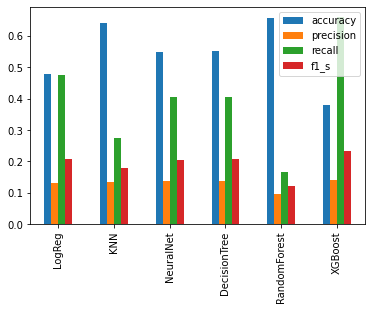

In [96]:
df = {'Model Used': 'XGBoost', 'accuracy': rff_acc, 'precision':rff_prec,'recall':rff_rec,'f1_s':rff_f1} 
df3 = results_under_sample.append(df, ignore_index = True) 
df3['Model Name'] = ['LogReg','KNN','NeuralNet','DecisionTree','RandomForest','XGBoost']
print(df3)
ax = df3[['Model Name','accuracy','precision','recall','f1_s']].plot(kind = 'bar')
ax.set_xticks(df3.index)
ax.set_xticklabels(df3['Model Name'], rotation=90)
df3[['Model Name','accuracy','precision','recall','f1_s']]

## SMOTE

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

new_label  = messages.label.replace(to_replace=['ham', 'spam'], value=[0, 1])

y_over = new_label
X_over = pd.DataFrame(messages_tfidf.todense())

x_train, x_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=27)

# setting up testing and training sets
sm = SMOTE(random_state=27, sampling_strategy=0.6)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

smote = LogisticRegression(solver='liblinear').fit(x_train, y_train)

smote_pred = smote.predict(x_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)


# f1 score
f1_score(y_test, smote_pred)
 

recall_score(y_test, smote_pred)


precision_score(y_test, smote_pred)



0.9818181818181818

In [17]:
def model_smote(x,y,x_t,y_t):
   
    accuracy=[]
    precision= []
    recall = []
    f1_s = []
 

    Log_R = LogisticRegression()
    KNN = KNeighborsClassifier()
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)
    NB = GaussianNB()
    DTC = DecisionTreeClassifier()
    RTC = RandomForestClassifier()
    
    algo_list= [Log_R,KNN,clf,DTC,RTC]
    

 
    dict_classifiers = {
        
    'Log_R':LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'clf': MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(15,), random_state=1),
    'DTC': DecisionTreeClassifier(),
    'RTC': RandomForestClassifier()
}
    
    for each_model, model_instantiation in dict_classifiers.items():


        classifier =  model_instantiation.fit(x, y)

        pred = classifier.predict(x_t)

        acc = accuracy_score(y_t, pred)
        accuracy.append(acc)
        prec = precision_score(y_t, pred)
        precision.append(prec)
        rec = recall_score(y_t, pred)
        recall.append(rec)
        f1 = f1_score(y_t, pred)
        f1_s.append(f1)


        msg = "%s = %.2f" % (each_model,round(acc, 2))
        msg = "%s = %.2f" % (each_model,round(prec, 2))
        msg = "%s = %.2f" % (each_model,round(rec, 2))
        msg = "%s = %.2f" % (each_model,round(f1, 2))

        metrics_data = (pd.DataFrame(zip(algo_list,accuracy,precision,recall,f1_s),columns=['Model Used','accuracy','precision','recall','f1_s']))
        
    return metrics_data

results_smote = model_smote( x= x_train, y= y_train, x_t = pd.DataFrame(x_test), y_t = y_test)



In [18]:
results_smote 

,Model Used,accuracy,precision,recall,f1_s
0,LogisticRegression(),0.970567,0.981818,0.810,0.887671
1,KNeighborsClassifier(),0.926777,1.000000,0.490,0.657718
2,"MLPClassifier(alpha=1e-05, hidden_layer_sizes=...",0.980617,0.957672,0.905,0.930591
3,DecisionTreeClassifier(),0.958363,0.877660,0.825,0.850515
4,RandomForestClassifier(),0.966260,1.000000,0.765,0.866856


In [20]:
from vecstack import stacking
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


models = [
   LogisticRegression(),
    KNeighborsClassifier(),
    MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1),
    #GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()       
    
]


S_train, S_test = stacking(models,                   
                           x_train, y_train, pd.DataFrame(x_test),   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [LogisticRegression]
    fold  0:  [0.97866483]
    fold  1:  [0.97040606]
    fold  2:  [0.97522368]
    fold  3:  [0.97520661]
    ----
    MEAN:     [0.97487529] + [0.00293964]
    FULL:     [0.97487524]

model  1:     [KNeighborsClassifier]
    fold  0:  [0.95526497]
    fold  1:  [0.96008259]
    fold  2:  [0.96421198]
    fold  3:  [0.97245179]
    ----
    MEAN:     [0.96300283] + [0.00630768]
    FULL:     [0.96300120]

model  2:     [MLPClassifier]
    fold  0:  [0.98967653]
    fold  1:  [0.99242946]
    fold  2:  [0.99380592]
    fold  3:  [0.99449036]
    ----
    MEAN:     [0.99260057] + [0.00184414]
    FULL:     [0.99260024]

model  3:     [DecisionTreeClassifier]
    fold  0:  [0.96971783]
    fold  1:  [0.96902959]
    fold  2:  [0.97522368]
    fold  3:  [0.96763085]
    ----
    MEAN:     [0.97040049] + [0.00288441]
    FULL:  

In [21]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)

model.fit(S_train,y_train)
y_pred = model.predict(S_test)

rff_acc = accuracy_score(y_test, y_pred)
print(f"{rff_acc} accuracy")
rff_prec = precision_score(y_test, y_pred)
print(f"{rff_prec} precision")
rff_rec = recall_score(y_test, y_pred)
print(f"{rff_rec} recall")
rff_f1 = f1_score(y_test, y_pred)
print(f"{rff_f1} f1_score")

[22:36:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9712849964106246 accuracy
0.9705882352941176 precision
0.825 recall
0.8918918918918919 f1_score


/Users/toyosibamidele/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


                                          Model Used  accuracy  precision  \
0                               LogisticRegression()  0.970567   0.981818   
1                             KNeighborsClassifier()  0.926777   1.000000   
2  MLPClassifier(alpha=1e-05, hidden_layer_sizes=...  0.980617   0.957672   
3                           DecisionTreeClassifier()  0.958363   0.877660   
4                           RandomForestClassifier()  0.966260   1.000000   
5                                            XGBoost  0.971285   0.970588   

   recall      f1_s    Model Name  
0   0.810  0.887671        LogReg  
1   0.490  0.657718           KNN  
2   0.905  0.930591     NeuralNet  
3   0.825  0.850515  DecisionTree  
4   0.765  0.866856  RandomForest  
5   0.825  0.891892       XGBoost  


,Model Name,accuracy,precision,recall,f1_s
0,LogReg,0.970567,0.981818,0.810,0.887671
1,KNN,0.926777,1.000000,0.490,0.657718
2,NeuralNet,0.980617,0.957672,0.905,0.930591
3,DecisionTree,0.958363,0.877660,0.825,0.850515
4,RandomForest,0.966260,1.000000,0.765,0.866856
5,XGBoost,0.971285,0.970588,0.825,0.891892


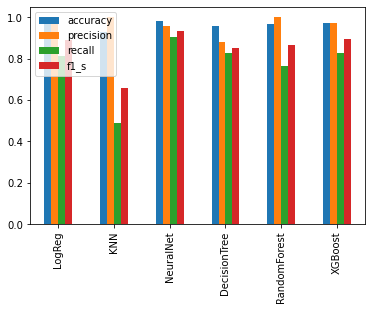

In [22]:
df = {'Model Used': 'XGBoost', 'accuracy': rff_acc, 'precision':rff_prec,'recall':rff_rec,'f1_s':rff_f1} 
df3 = results_smote.append(df, ignore_index = True) 
df3['Model Name'] = ['LogReg','KNN','NeuralNet','DecisionTree','RandomForest','XGBoost']
print(df3)
ax = df3[['Model Name','accuracy','precision','recall','f1_s']].plot(kind = 'bar')
ax.set_xticks(df3.index)
ax.set_xticklabels(df3['Model Name'], rotation=90)
df3[['Model Name','accuracy','precision','recall','f1_s']]